In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
%matplotlib inline

In [2]:
# File and folder paths
dirpath = "/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_polar_files_for_mosaic"


out_fp = os.path.join(dirpath, "final_mosaic_rasterio_15_16_april2016.tif")

# Make a search criteria to select the DEM files
search_criteria = 'raster_path_*'+'*_reprojToEPSG_3995.tif'
q = os.path.join(dirpath, search_criteria)
print(q)

/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_polar_files_for_mosaic/raster_path_**_reprojToEPSG_3995.tif


In [3]:
# glob function can be used to list files from a directory with specific criteria
dem_fps = glob.glob(q)

# Files that were found:
len(dem_fps)

1047

In [4]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

# src_files_to_mosaic

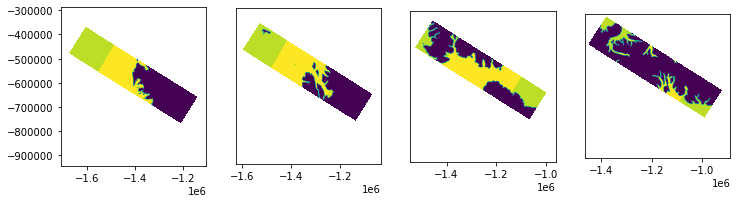

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)


In [6]:
# # Merge function returns a single mosaic array and the transformation info
# mosaic, out_trans = merge(src_files_to_mosaic)#, method='max')

# # Plot the result
# show(mosaic, cmap='terrain')

In [ ]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic, method='max')

# Plot the result
show(mosaic, cmap='terrain')

In [ ]:
out_trans

In [ ]:
# Copy the metadata
out_meta = src.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans})

In [ ]:
# Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)